<a href="https://colab.research.google.com/github/PeizuLi5/Flix/blob/main/SyntheticDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

synthetic = pd.read_csv('/content/synthetic_dataset.csv')

In [ ]:
print(len(synthetic))

50


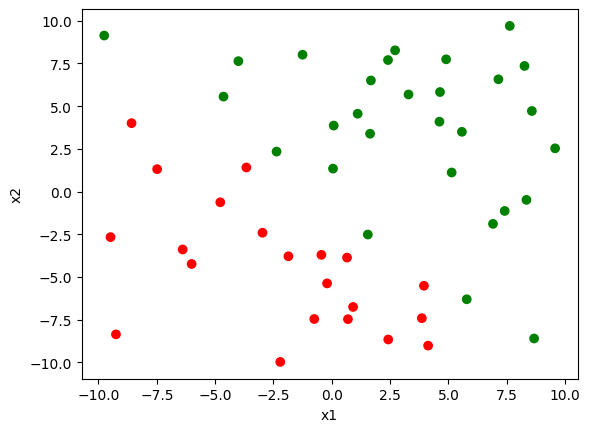

In [ ]:
x1 = synthetic["x1"]
x2 = synthetic["x2"]
y = synthetic["y"]

plt.scatter(x1, x2, c=ListedColormap(("red", "green"))(y))
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

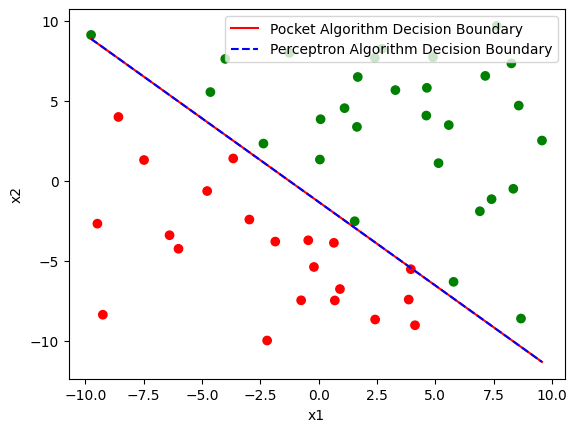

In [ ]:
data = np.array(synthetic)

x1 = data[:, :-1]
state = data[:, -1]
w = np.zeros(x1.shape[1])
b = 0

pocket_w = np.zeros(x1.shape[1])
pocket_b = 0
pocket_accuracy = 0

def accuracy(x1, state, w, b):
    predictions = np.sign(np.dot(x1, w) + b)
    return np.mean(predictions == state)

def perceptron_learning(x1, state, max_epochs):
    for epoch in range(max_epochs):
        misclassified = 0
        for i in range(x1.shape[0]):
            if state[i] * (np.dot(x1[i], w) + b) <= 0:
                w += state[i] * x1[i]
                b += state[i]
                misclassified += 1
        if misclassified == 0:
            break

max_epochs = len(data)

for epoch in range(max_epochs):
    misclassified = 0
    for i in range(x1.shape[0]):
        if state[i] * (np.dot(x1[i], w) + b) <= 0:
            w += state[i] * x1[i]
            b += state[i]
            misclassified += 1
    current_accuracy = accuracy(x1, state, w, b)
    if current_accuracy > pocket_accuracy:
        pocket_w = w.copy()
        pocket_b = b
        pocket_accuracy = current_accuracy

plt.scatter(x1[:, 0], x1[:, 1], c=ListedColormap(("red", "green"))(state))

x_decision = np.linspace(np.min(x1[:, 0]), np.max(x1[:, 0]), 100)
y_decision = (-pocket_w[0] * x_decision - pocket_b) / pocket_w[1]
plt.plot(x_decision, y_decision, label="Pocket Algorithm Decision Boundary", color="red")

y_perceptron = (-w[0] * x_decision - b) / w[1]
plt.plot(x_decision, y_perceptron, label="Perceptron Algorithm Decision Boundary", linestyle="--", color="blue")

plt.title("PLA graph")
plt.xlabel("x1")
plt.ylabel("x2")

plt.show()